<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Replicating the Lesson Code

In [2]:
#copying over text cells from my copy of lecture notebook
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

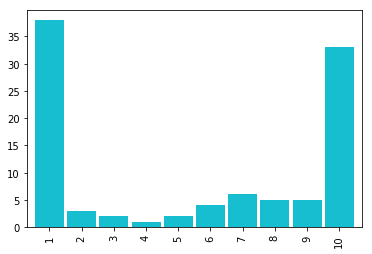

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plt.stule.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))
#color='C1', width=0.9
fake.plot.bar(color='C9', width=0.9);

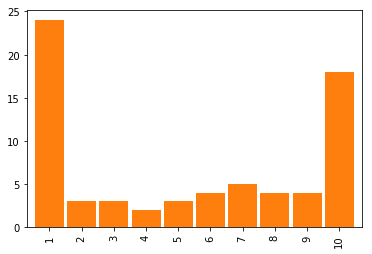

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

#ax.grid(True)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans Mono'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


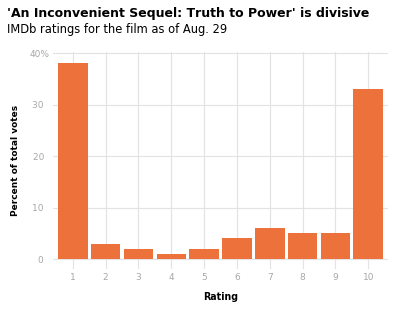

In [5]:
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

#Generage figure and ax
#Better idea to split up fig and ax instead of using plt. way

fig = plt.figure()
ax = fake.plot.bar(color='#ED713A', width=0.9)
ax.set(facecolor='white')
fig.set(facecolor='white')
# he is also doing fig.patch.set(facecolor='white)
ax.set_alpha(0)

#Changing color and width of grid
ax.grid(color='#E3E3E3', lw=1.2)

# fig.suptitle('test title')
# ax.text(x=4, y=20, s='Axis Title String')
# ax.set_title('ax.set_title')
# plt.title('plt title')

# If we want a really custom title
# We can just use a text annotation and position it like a title
# matplotlib.pyplot.text search
# When looking at documentation. Look at the OTHER PARAMETERS section
# Pay attention to these *Kwargs
ax.text(x=-2, y=47, s="'An Inconvenient Sequel: Truth to Power' is divisive",
        fontweight='bold',
        fontsize=12.5)
ax.text(x=-2, y=44, s="IMDb ratings for the film as of Aug. 29",
        fontsize=11.5,
        fontname='Bitstream Vera Sans Mono')

#setting X and Y label
#Important to note that these are just text objects that have been rotated
ax.set_ylabel('Percent of total votes',
              fontsize=9,
              fontweight='bold',
              labelpad=10)
ax.set_xlabel('Rating',
              fontsize=9.5,
              fontweight='bold',
              labelpad=10)

# fix our tick labels
ax.set_xticklabels(range(1,11), rotation=0, color='#A7A7A7',
                   fontsize=9)
ax.set_yticklabels(['0  ','10  ','20  ','30  ','40%'], color='#A7A7A7',
                   fontsize=9)
#This only sets the albels, so we need to set the ticks for the y label
ax.set_yticks(range(0,50,10))

# This removes the left and right sides of the grid
ax.spines['right'].set_visible=False
ax.spines['left'].set_visible=False
ax.spines['bottom'].set_visible=True
# This removes the random border around the graph. No idea why it was there
plt.box(on=None) 
# Messing with the grid line length
#ax.margins(.09) 
# .margins() only helped extend the top and bottom. set x/ylim worked
ax.set_xlim(left=-.6,right=9.6)
ax.set_ylim(bottom=-2,top=40.25)

#When I copied over the above portion, for some reason the grid lines
#were showing through
ax.set_axisbelow(b=True)

#Also, the tick marks were showing up as black dashes next to the ticks
ax.tick_params(axis='both', size=0)

#need either this or ; at the end to show graph w/o the extra text above
plt.show()

In [6]:
display(example)

# Another FiveThirtyEight Example

In [7]:
url2 = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/bialik-datalab-parisattacks-3.png?w=575'
example2 = Image(url=url2, width=500)

display(example2)

In [0]:
# Fake data to replicate the graph
fr_arrests = [90,80,45,100,55,95,140,190]
non_fr_arrests = [110,110,65,80,65,55,80,205]
total_eu_arrests = [200,190,110,180,120,150,220,395]
#Leading with empty spaces to have them line up with the original better
years = ['2007'," '08"," '09"," '10"," '11"," '12"," '13"," '14"]

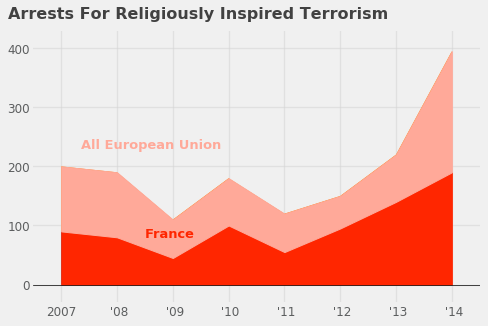

In [147]:
#Creating subplots to stack
fig, ax = plt.subplots(figsize=(8,5))
#Stacking remaining EU arrests on France arrests
ax.stackplot(years,fr_arrests,non_fr_arrests)
#Showing the grid in the background
ax.grid(color='#D4D4D4', lw=1.3,alpha=0.55)
#Creating a title
ax.text(x=-0.95, y=450, s='Arrests For Religiously Inspired Terrorism',
        color='#414141',
        fontsize=16,
        fontweight='bold',
        family='sans-serif')
#Text in graph
ax.text(x=.35, y=230, s='All European Union',
        color='#FFA999',
        fontsize=13,
        fontweight='bold',
        family='sans-serif')
ax.text(x=1.5, y=80, s='France',
        color='#FF2600',
        fontsize=13,
        fontweight='bold',
        family='sans-serif')
#Filling in with different colors
ax.fill_between(years,fr_arrests,y2=0, color='#FF2600')
ax.fill_between(years,total_eu_arrests,fr_arrests, color='#FFA999')

#Adjusting tick labels
ax.set_xticklabels(labels=years,color='#5C5E5F',fontsize=12,family='sans-serif')
ax.set_yticklabels(labels=(range(-100,500,100)),color='#5C5E5F',fontsize=12)
#Changing figure and axis background to colormatch the example
fig.set(facecolor='#F0F0F0');
ax.set(facecolor='#F0F0F0')

#Setting the grid behind the information on the graph 
ax.set_axisbelow(b=True)

#Extending the grid above and below the graph
ax.set_xlim(left=-0.5 ,right=7.5)
ax.set_ylim(bottom=-30,top=430)

#Removing the border
plt.box(on=None)

#Removing the tick marks
ax.tick_params(axis='both', size=0)

#Not sure how to bold just the y=0 axis, so adding another line
plt.axhline(0,color='black',lw=.7)
#ax.spines['bottom'].set_visible=False

plt.show()

In [54]:
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here